In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from datetime import datetime, date
import math
from math import radians, sin, cos, acos, atan2
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#check for null values
data.isnull().sum ()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In [ ]:
#check columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Analyzing Class Distribution:


The research project focuses on credit card fraud detection, which involves understanding the distribution of fraudulent and non-fraudulent transactions. By analyzing the class distribution, we can gain insights into the imbalance of the data and the prevalence of fraud cases. The following code calculates and prints the number of fraud cases and non-fraud cases in the data set:

By filtering the DataFrame based on the 'Class' column (where '1' represents fraud and '0' represents non-fraud), the code counts the occurrences of each class. This information provides an understanding of the class distribution and helps identify any class imbalance issues.

In [ ]:
fraud_cases = len(data[data['Class'] == 1])
non_fraud_cases = len(data[data['Class'] == 0])

print('Number of fraud cases:', fraud_cases)
print('Number of non-fraud cases:', non_fraud_cases)

Number of fraud cases: 492
Number of non-fraud cases: 284315


Descriptive Statistics:

Descriptive statistics provide summary measures that describe the central tendency, dispersion, and shape of the data. These statistics can offer insights into the transaction amounts for fraud and genuine transactions. The following code calculates and displays the descriptive statistics for the 'Amount' column separately for fraud and genuine transactions:

In [ ]:
fraud = data[data['Class'] == 1]
genuine = data[data['Class'] == 0]

print('Descriptive statistics for fraud transactions:')
print(fraud['Amount'].describe())

print('\nDescriptive statistics for genuine transactions:')
print(genuine['Amount'].describe())


Descriptive statistics for fraud transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Descriptive statistics for genuine transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Exploratory Data Analysis

Histogram Plot:

Visualizing the distribution of the numerical variables can provide valuable insights into the data. The following code generates a histogram plot for the entire data set:

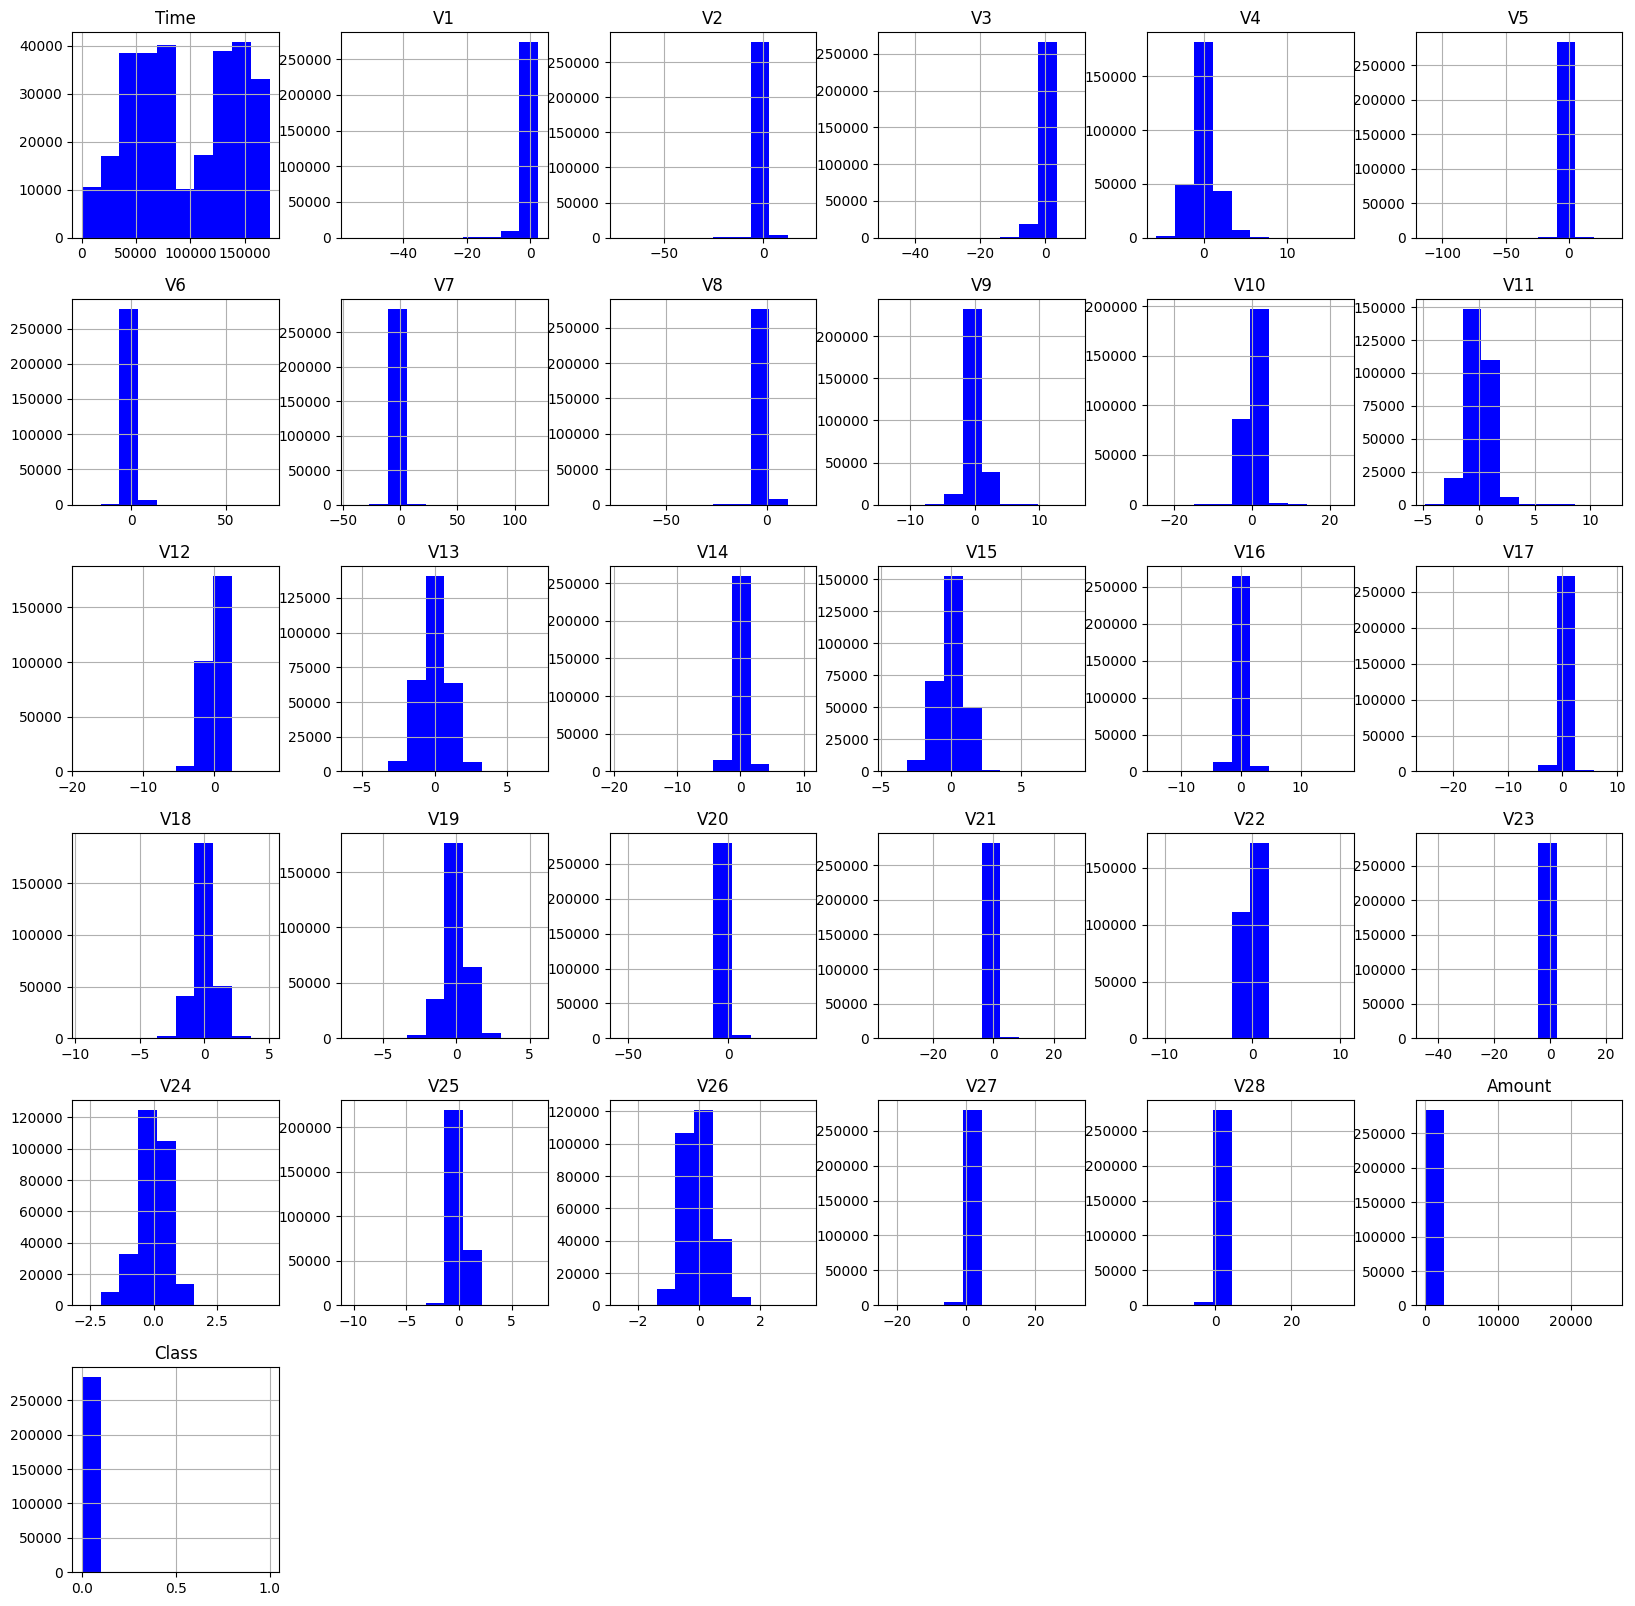

In [ ]:
data.hist(figsize=(20,20),color='Blue')
plt.show()

Correlation Matrix:

Calculating and visualizing the correlation between variables helped us to  identify relationships and dependencies within the data.

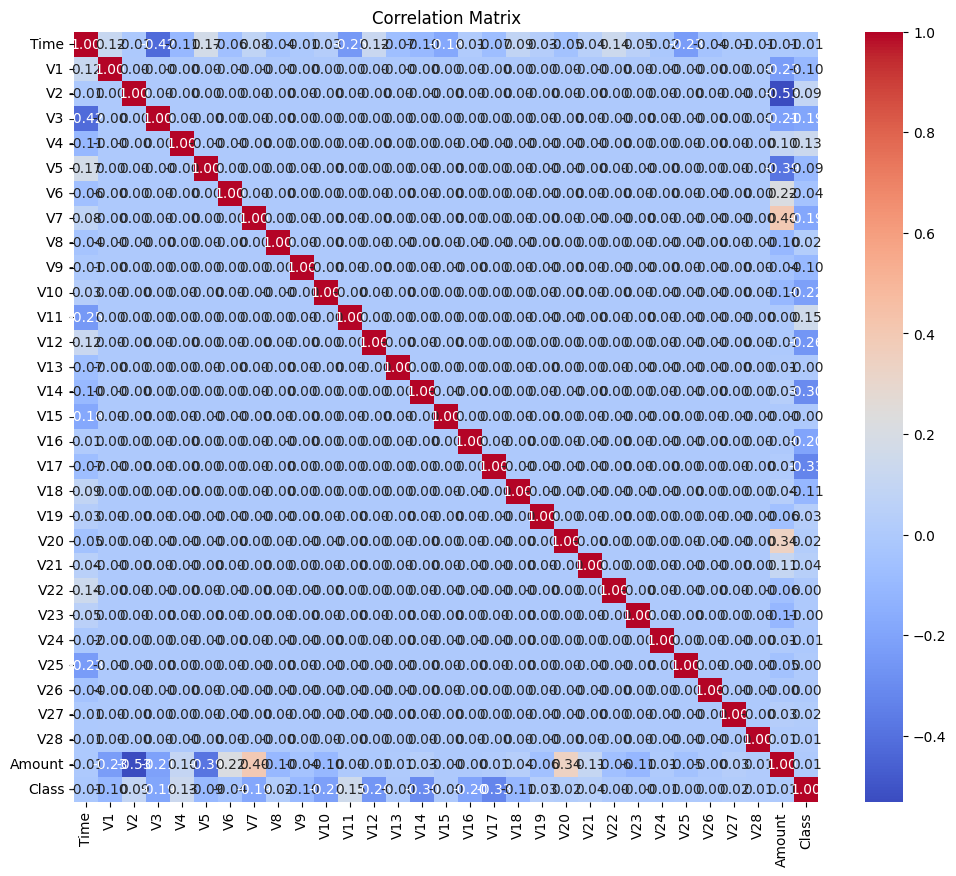

In [ ]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


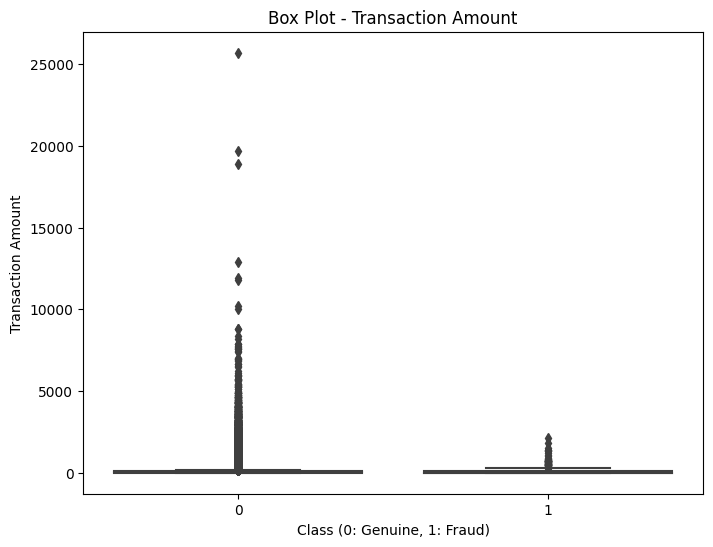

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette=["#1f77b4", "#ff7f0e"])
plt.title('Box Plot - Transaction Amount')
plt.xlabel('Class (0: Genuine, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()



To allow us visualize any potential patterns or relationships between the time of transactions and the transaction amounts. we used a scatter plot to gain insights into the behavior of fraudulent and genuine transactions in terms of their timing and amounts.

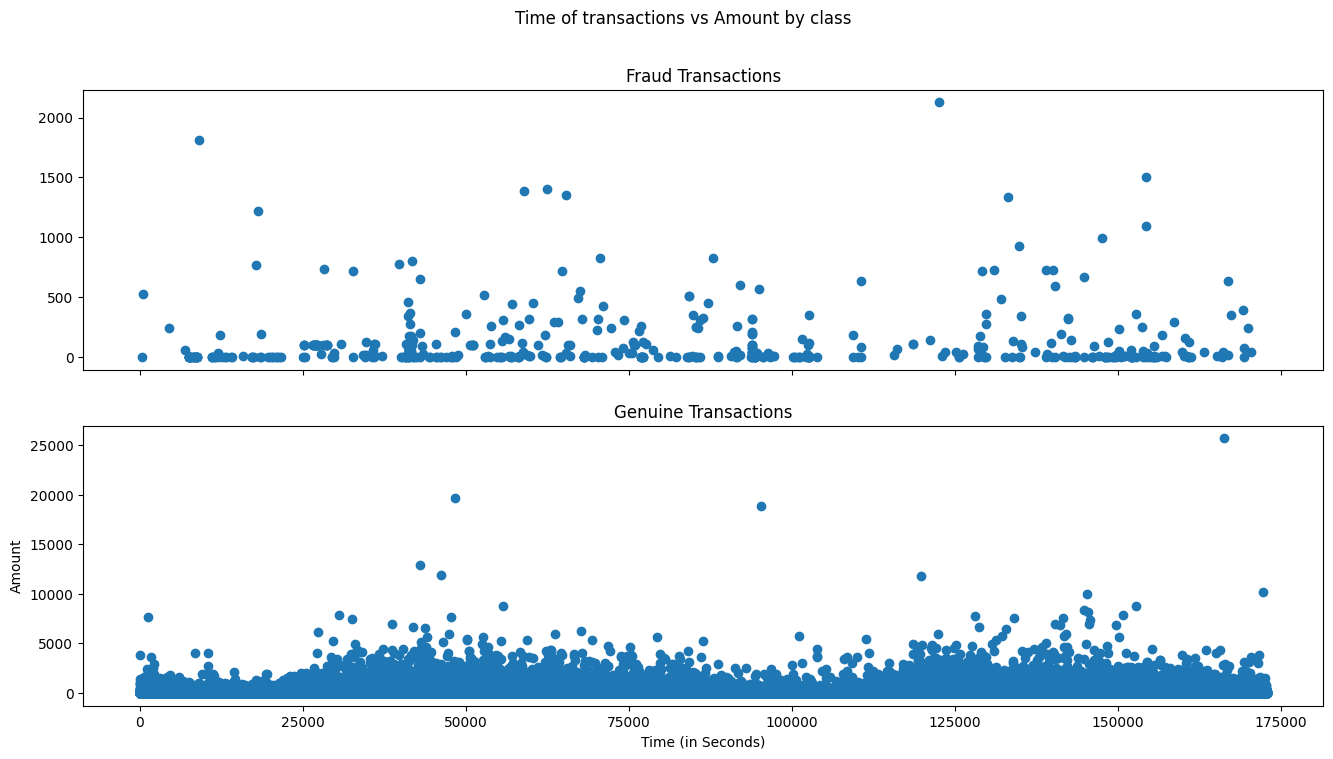

In [ ]:
plt.rcParams['figure.figsize'] = (16, 8)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transactions vs Amount by class')

ax1.scatter(fraud['Time'], fraud['Amount'])
ax1.set_title('Fraud Transactions')

ax2.scatter(genuine['Time'], genuine['Amount'])
ax2.set_title('Genuine Transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


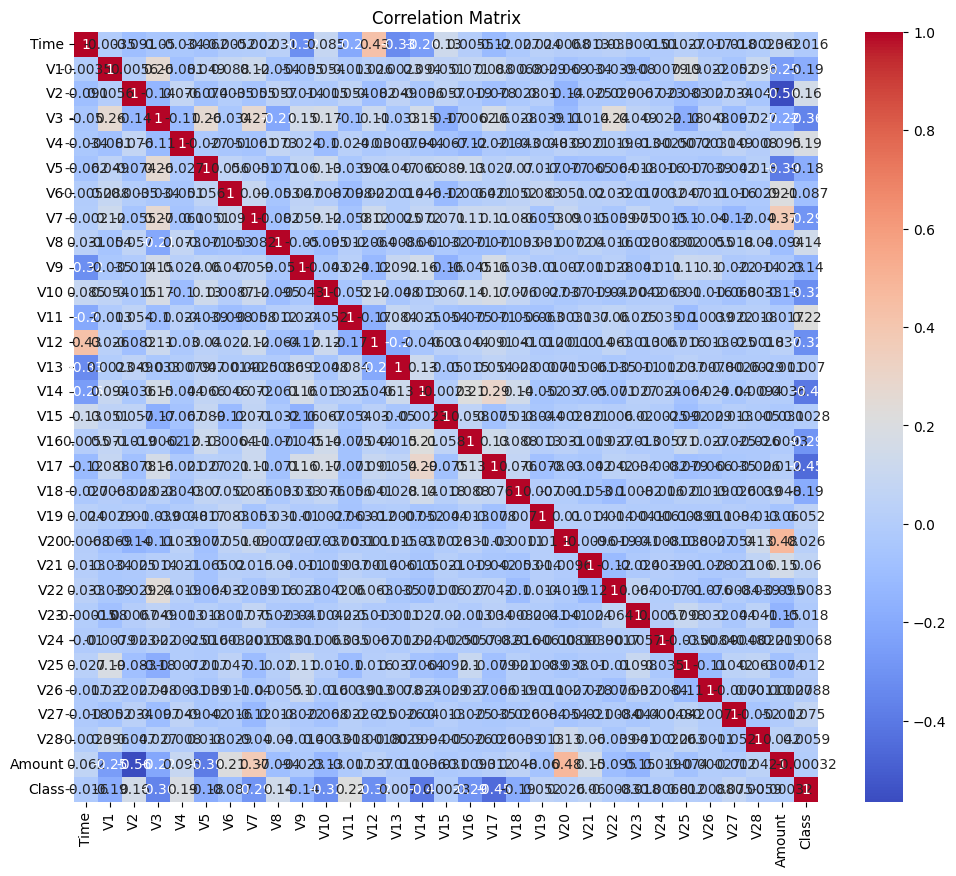

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate feature correlations
correlation_matrix = data.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Class', ylabel='count'>

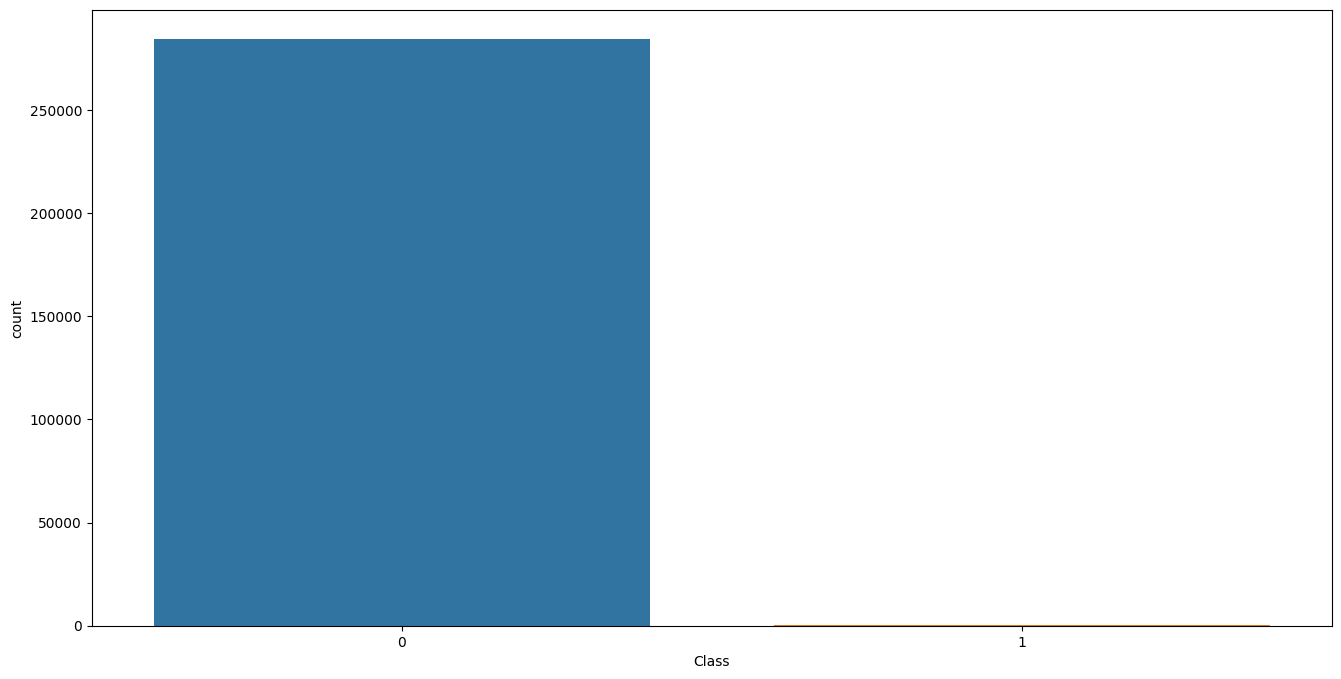

In [ ]:
import seaborn as sns

sns.countplot(x=df['Class'], data=df)

In [ ]:
                                                          df['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rob_scaler = RobustScaler()

In [ ]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
# df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1.736885,-0.995150
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.275579,-0.995150
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,4.873990,-0.995138
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1.379126,-0.995138
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.646213,-0.995125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261403,159998.0,1.724657,-0.106982,0.157860,3.956417,-0.567248,0.250016,-0.557382,0.192135,0.018389,...,0.099424,-0.083214,-0.266593,0.087290,-0.009315,-0.023482,80.05,0.0,0.784002,1.009862
261404,159998.0,-0.116710,0.622664,0.226647,-1.135911,0.791377,-0.669894,0.959207,-0.012747,-0.200576,...,0.080221,-0.433651,-1.079465,-0.044587,0.142399,0.205543,1.29,0.0,-0.294754,1.009862
261405,160000.0,1.985257,-0.382365,-0.280022,0.494186,-0.721312,-0.528243,-0.574594,-0.077543,1.421329,...,0.096345,-0.074478,-0.064417,-0.207358,0.044080,-0.036908,9.99,0.0,-0.175592,1.009887
261406,160001.0,-0.895792,1.271062,-1.315209,-1.293758,1.064260,-1.087220,1.296419,0.054068,-0.103692,...,-0.097011,0.712642,-0.264557,0.027453,0.300886,0.125450,15.41,0.0,-0.101356,1.009900


Overall

(0.0, 25691.16)

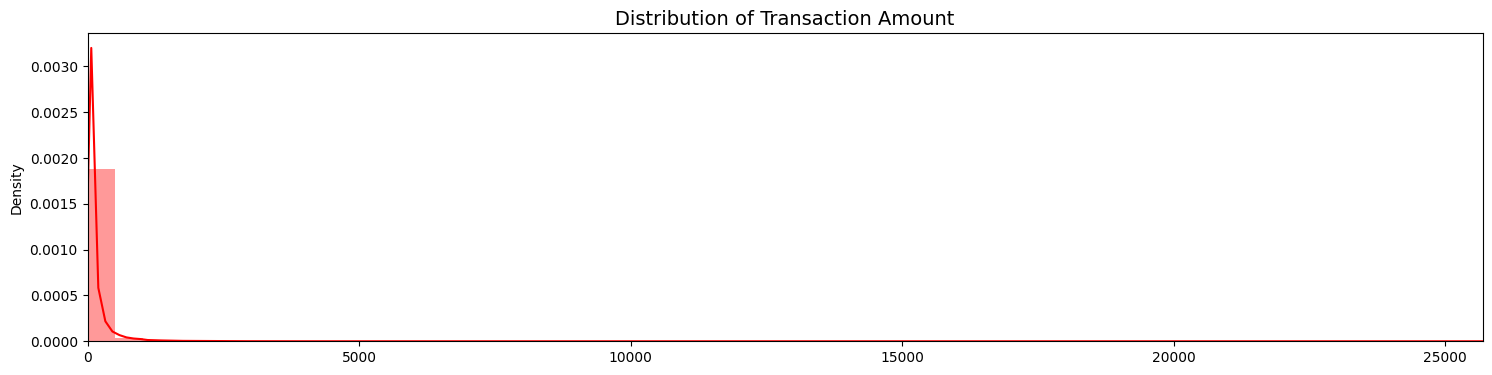

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])

# Only for fraud

(0.0, 2125.87)

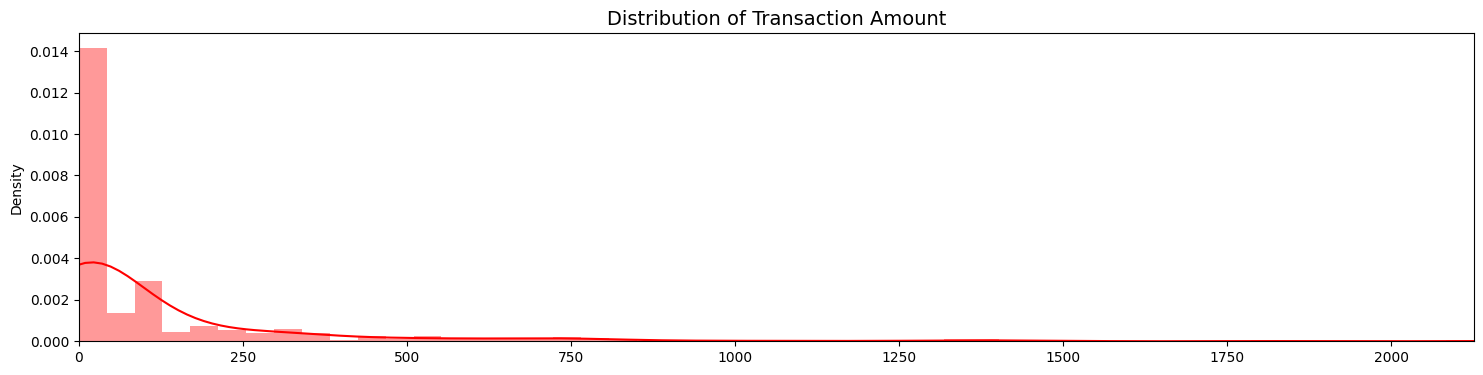

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18,4))

amount_val = df[df['Class']==1]['Amount'].values
sns.distplot(amount_val, ax=ax, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])

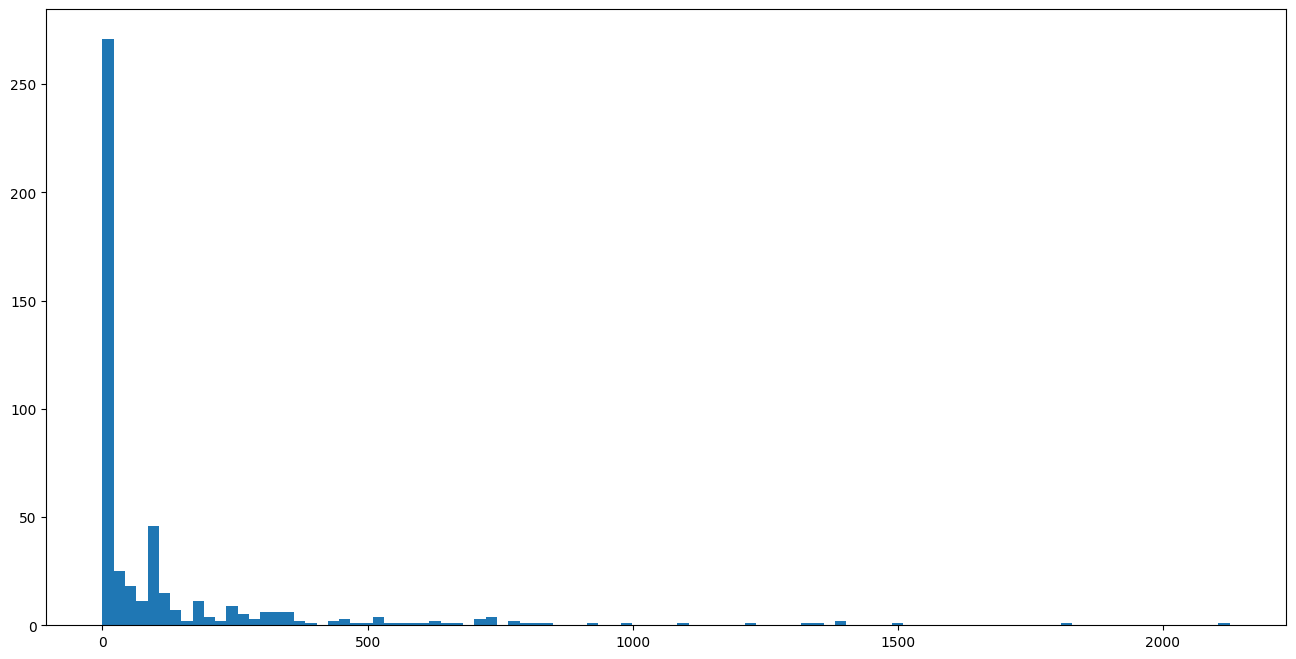

In [ ]:
# regression: Amount

plt.hist(amount_val,bins=100)
plt.show()

In [ ]:
max(amount_val)

2125.87

In [ ]:
amount_val[amount_val>1000].shape

(9,)

In [ ]:
len(amount_val)

492

In [ ]:
y = df['Amount'].values

In [ ]:
y[y>4500].shape

(77,)

In [ ]:
df.shape

(284807, 33)

In [ ]:
amount_val.shape

(492,)

In [ ]:
df[df['Class']==1]['Amount'].values

array([0.00000e+00, 5.29000e+02, 2.39930e+02, 5.90000e+01, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.10000e+00, 1.00000e+00, 1.00000e+00, 1.80968e+03,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 3.03900e+01, 1.79660e+02, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.13900e+01, 3.79000e+00,
       3.79000e+00, 3.93000e+00, 1.00000e+00, 7.66360e+02, 1.21889e+03,
       1.00000e+00, 1.88780e+02, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       1.00000e+00, 3.12000e+00, 9.99900e+01, 9.99900e+01, 9.99900e+01,
       3.76000e+00, 9.99900e+01, 9.99900e+01, 9.99900e+01, 9.99900e+01,
       9.99900e+01, 9.99900e+01, 9.99900e+01, 9.99900e+01, 9.999

# Cluster

In [ ]:
df.drop(['Time','Amount'],inplace=True,axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [ ]:
data = df[df['Class']==1]

Q1: Cluster the dataset to find the appropriate grouping

In [ ]:
X = df.drop('Class',axis=1)

In [ ]:
from tqdm.notebook import tqdm

  0%|          | 0/29 [00:00<?, ?it/s]

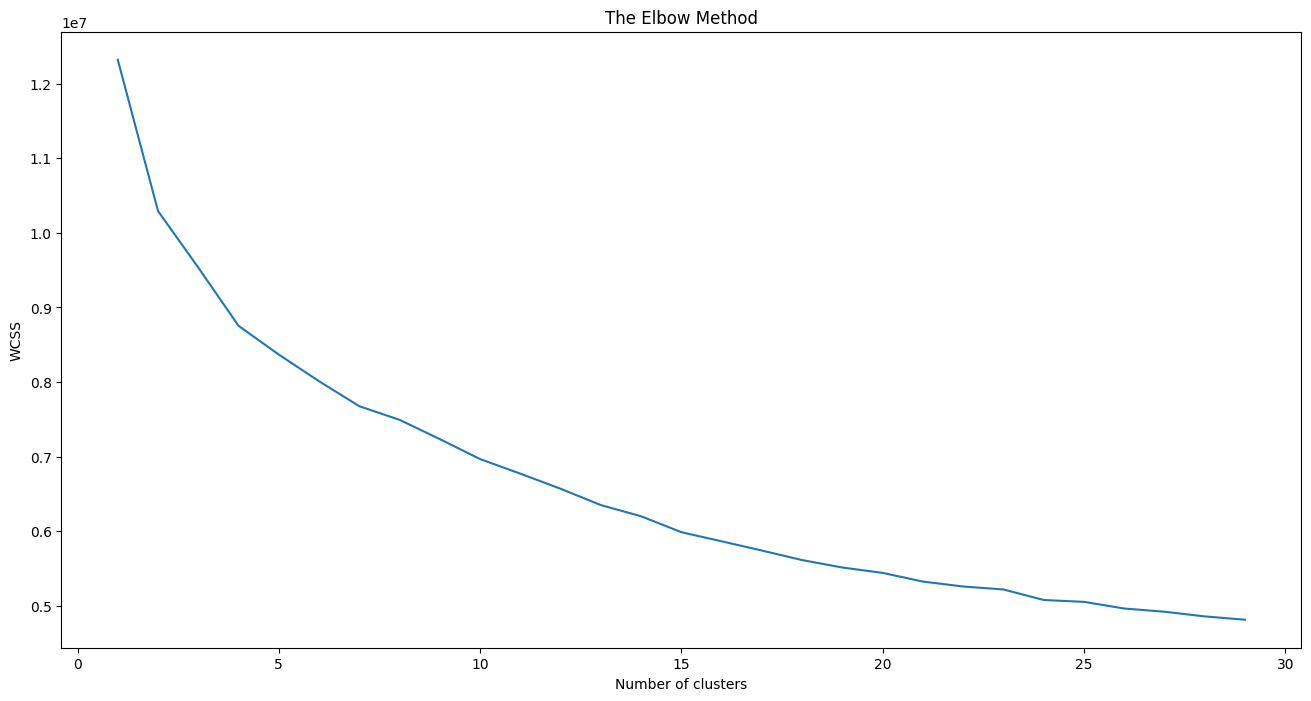

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in tqdm(range(1, 30)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 30, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=30, random_state=42)

In [ ]:
cluster_class = kmeans.predict(X)

In [ ]:
df['cluster_class'] = cluster_class
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time,cluster_class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983,19
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983,24
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972,28
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972,21
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951,7
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963,8
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975,2
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975,19


In [ ]:
x = df[df['Class']==1]['cluster_class']

In [ ]:
x.min()

0

In [ ]:
x.max()

28

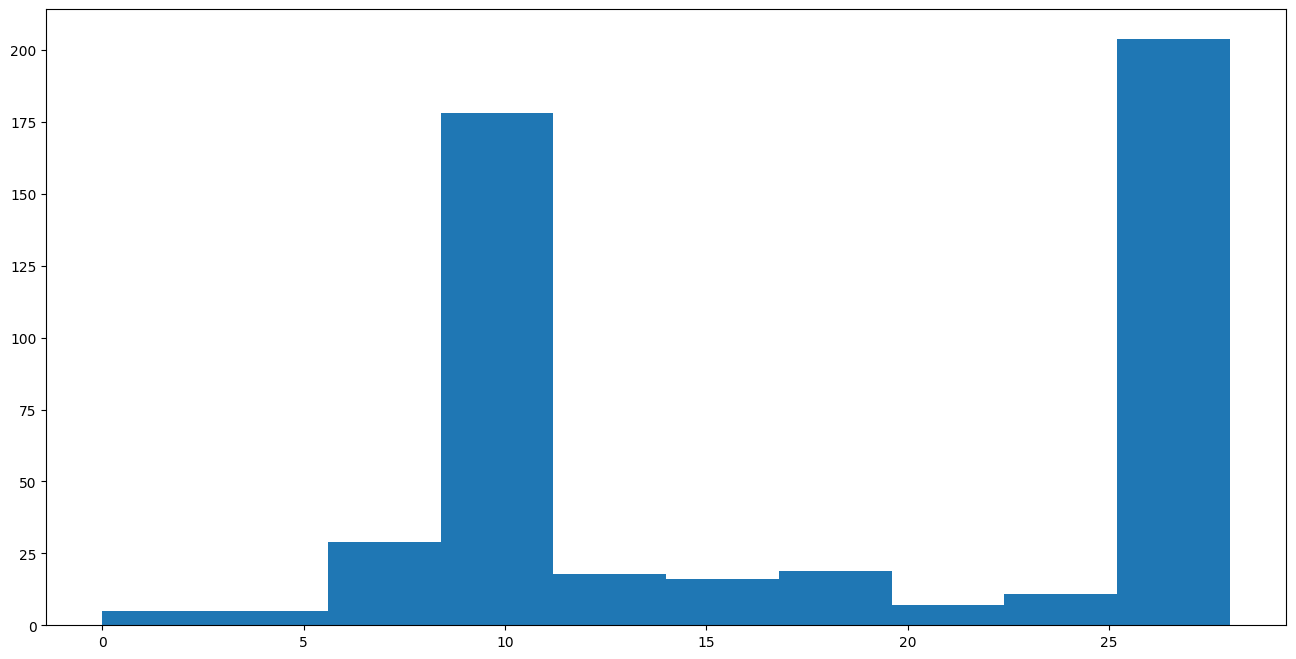

In [ ]:
plt.hist(x,bins=10)
plt.show()

In [ ]:
# cluster for fraud transactions
# make all non fraud as ONE CLUSTER
# classify fraud

In [ ]:
from collections import Counter

In [ ]:
x = Counter(x)

In [ ]:
sorted(x.items(),key=lambda t:t[1],reverse=True)

[(26, 170),
 (11, 161),
 (28, 21),
 (10, 17),
 (19, 17),
 (6, 15),
 (8, 14),
 (27, 13),
 (12, 12),
 (16, 8),
 (24, 7),
 (13, 6),
 (14, 5),
 (20, 5),
 (3, 5),
 (1, 3),
 (15, 3),
 (18, 2),
 (25, 2),
 (0, 2),
 (23, 2),
 (21, 1),
 (22, 1)]

In [ ]:
# cluster 26 and 11

In [ ]:
df.loc[df.Class==0, 'cluster_class'] = 'Cluster_1'

In [ ]:
df.loc[(df.Class==1)&(df.cluster_class==11), 'cluster_class'] = 'Cluster_2'

In [ ]:
df.loc[(df.Class==1)&(df.cluster_class==26), 'cluster_class'] = 'Cluster_3'

In [ ]:
# df.loc[(df.Class==1)&(df.cluster_class!=11)&(df.cluster_class!=26), 'cluster_class'] = 'Cluster_4'

In [ ]:
df.cluster_class

0         Cluster_1
1         Cluster_1
2         Cluster_1
3         Cluster_1
4         Cluster_1
            ...    
284802    Cluster_1
284803    Cluster_1
284804    Cluster_1
284805    Cluster_1
284806    Cluster_1
Name: cluster_class, Length: 284807, dtype: object

In [ ]:
df.cluster_class.unique()

array(['Cluster_1', 'Cluster_2', 28, 13, 'Cluster_3', 14, 18, 24, 10, 25,
       19, 6, 12, 21, 8, 0, 27, 22, 20, 3, 1, 16, 15, 23], dtype=object)

In [ ]:
df.loc[(df.Class==1) & (~df.cluster_class.isin(['Cluster_1','Cluster_2','Cluster_3'])), 'cluster_class'] = 'Cluster_4'

In [ ]:
df = pd.get_dummies(df)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,scaled_amount,scaled_time,cluster_class_Cluster_1,cluster_class_Cluster_2,cluster_class_Cluster_3,cluster_class_Cluster_4
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983,1,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983,1,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972,1,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.221929,0.062723,0.061458,0,1.418291,-0.994972,1,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.502292,0.219422,0.215153,0,0.670579,-0.994960,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.250034,0.943651,0.823731,0,-0.296653,1.034951,1,0,0,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-0.395255,0.068472,-0.053527,0,0.038986,1.034963,1,0,0,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.087371,0.004455,-0.026561,0,0.641096,1.034975,1,0,0,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.546668,0.108821,0.104533,0,-0.167680,1.034975,1,0,0,0


# Q2. Classifications: classify if the given data leads to fraud/Non-fraud transaction

In [ ]:
df = df.sample(frac=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,scaled_amount,scaled_time,cluster_class_Cluster_1,cluster_class_Cluster_2,cluster_class_Cluster_3,cluster_class_Cluster_4
243026,-1.072770,-0.550694,1.375009,-0.776730,1.133149,-0.603424,-0.329113,0.269164,0.800579,-1.048531,...,-0.375710,0.141190,0.197685,0,-0.167819,0.787920,1,0,0,0
23819,-1.050754,0.093944,1.371773,0.326664,0.928250,-0.402170,0.815234,-0.185530,-0.095973,-0.167976,...,-0.595702,-0.061874,-0.115547,0,0.747572,-0.608078,1,0,0,0
12719,-0.590628,1.277974,1.069263,-0.321459,0.749673,0.239870,0.502405,0.062878,0.818412,-0.220357,...,0.102210,0.342504,0.154578,0,-0.282540,-0.733009,1,0,0,0
128966,-0.741565,1.235598,0.785172,-0.082997,-0.008408,-0.541453,0.176224,0.547794,-0.747489,-0.551381,...,0.081047,0.116419,0.009505,0,-0.294977,-0.067987,1,0,0,0
772,1.153455,-0.414609,-0.356476,0.330125,-0.221110,-0.545366,0.296184,-0.339412,-1.355716,0.723105,...,-0.656075,0.002982,0.043879,0,1.726542,-0.988158,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117410,-0.820070,-0.443621,1.451440,-1.537326,-1.183845,0.467014,-0.884608,0.510624,-2.736920,0.772454,...,0.154015,-0.007492,-0.020713,0,0.936212,-0.117788,1,0,0,0
269435,-0.472631,1.403458,-1.945735,-0.857710,1.287599,0.017130,-0.414008,-2.310921,-0.927310,-0.909021,...,0.523006,-0.111604,0.067366,0,-0.296793,0.927701,1,0,0,0
39054,-0.981498,0.806323,1.577770,-0.466577,0.747333,-0.729722,0.861856,-0.192282,-0.177921,-0.482672,...,-0.051244,0.040132,-0.053453,0,-0.070146,-0.528895,1,0,0,0
164961,-2.069528,-0.343688,0.076669,1.145117,1.124391,-0.256085,0.931437,-0.320231,0.535459,1.186684,...,-0.285546,-0.359897,0.877796,0,0.167680,0.380890,1,0,0,0


In [ ]:
df[df['Class']==1].shape

(492, 35)

In [ ]:
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [ ]:
df = pd.concat([fraud_df, non_fraud_df])

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,scaled_amount,scaled_time,cluster_class_Cluster_1,cluster_class_Cluster_2,cluster_class_Cluster_3,cluster_class_Cluster_4
58375,1.089317,-0.190118,1.220640,1.116580,-0.869297,0.447125,-0.849443,0.453032,0.765415,0.031268,...,-0.380763,0.071696,0.020320,0,-0.290924,-0.426908,1,0,0,0
11841,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,-13.175198,...,0.649921,2.149247,-1.406811,1,-0.293440,-0.756118,0,0,1,0
150117,-1.462271,1.012996,1.546355,4.621016,0.417527,0.872092,0.047323,0.723956,-1.052572,0.942139,...,-0.076221,0.147700,-0.026364,0,1.286942,0.092717,1,0,0,0
177195,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,0.004847,-2.776747,...,-0.539073,0.503418,-0.237807,1,-0.153706,0.450969,0,0,0,1
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,0.520508,1.937421,-1.552593,1,-0.135401,-0.558336,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222133,-3.613850,-0.922136,-4.749887,3.373001,-0.545207,-1.171301,-4.172315,1.517016,-1.775833,-3.754054,...,-0.788329,1.055442,0.099971,1,1.715923,0.683138,0,0,0,1
12369,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,-12.744761,...,0.687037,2.078081,-1.429517,1,-0.293440,-0.740493,0,0,1,0
221723,-0.500363,1.466048,-1.577605,0.094721,0.250386,-0.834312,0.036521,0.639677,-0.252439,-0.726071,...,0.166344,-0.246153,-0.072642,0,-0.230699,0.681199,1,0,0,0
42696,-8.426814,6.241659,-9.946470,8.199614,-8.213093,-2.522046,-11.643028,5.339500,-7.051016,-12.265324,...,0.483162,1.195671,0.198294,1,0.925452,-0.510920,0,0,1,0


<Axes: xlabel='Class', ylabel='count'>

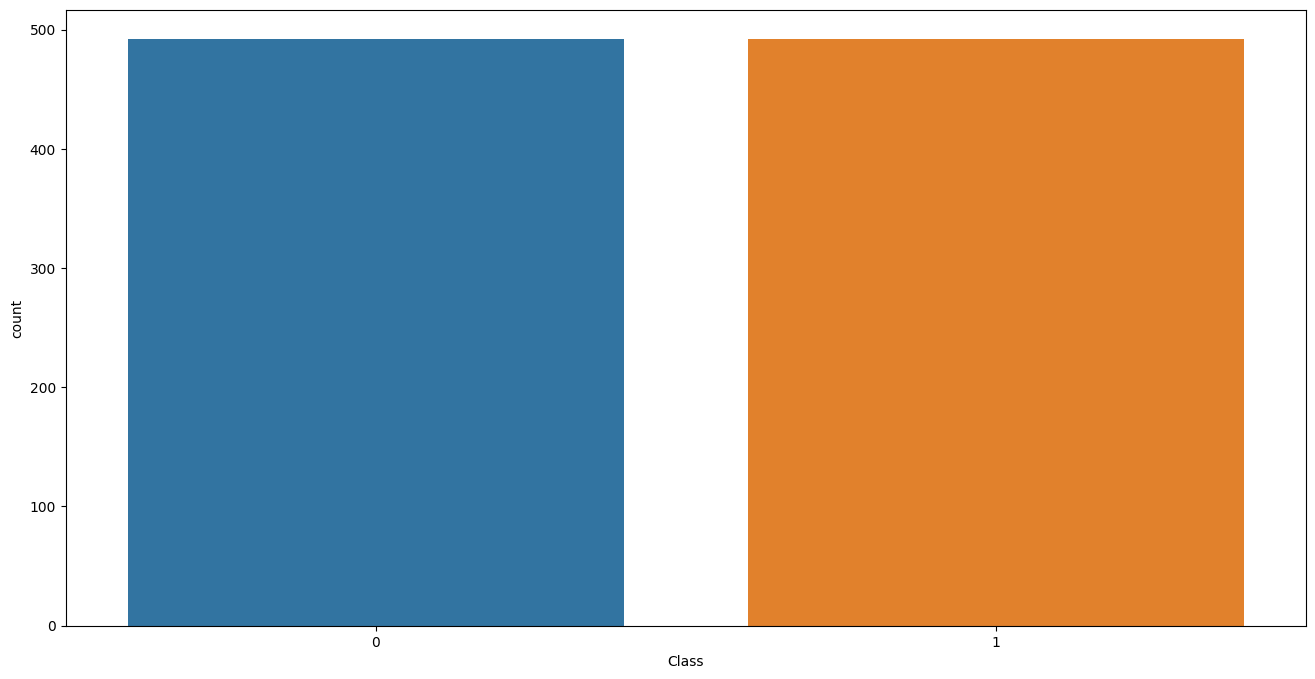

In [ ]:
sns.countplot(x=df['Class'],data=df)

<Axes: >

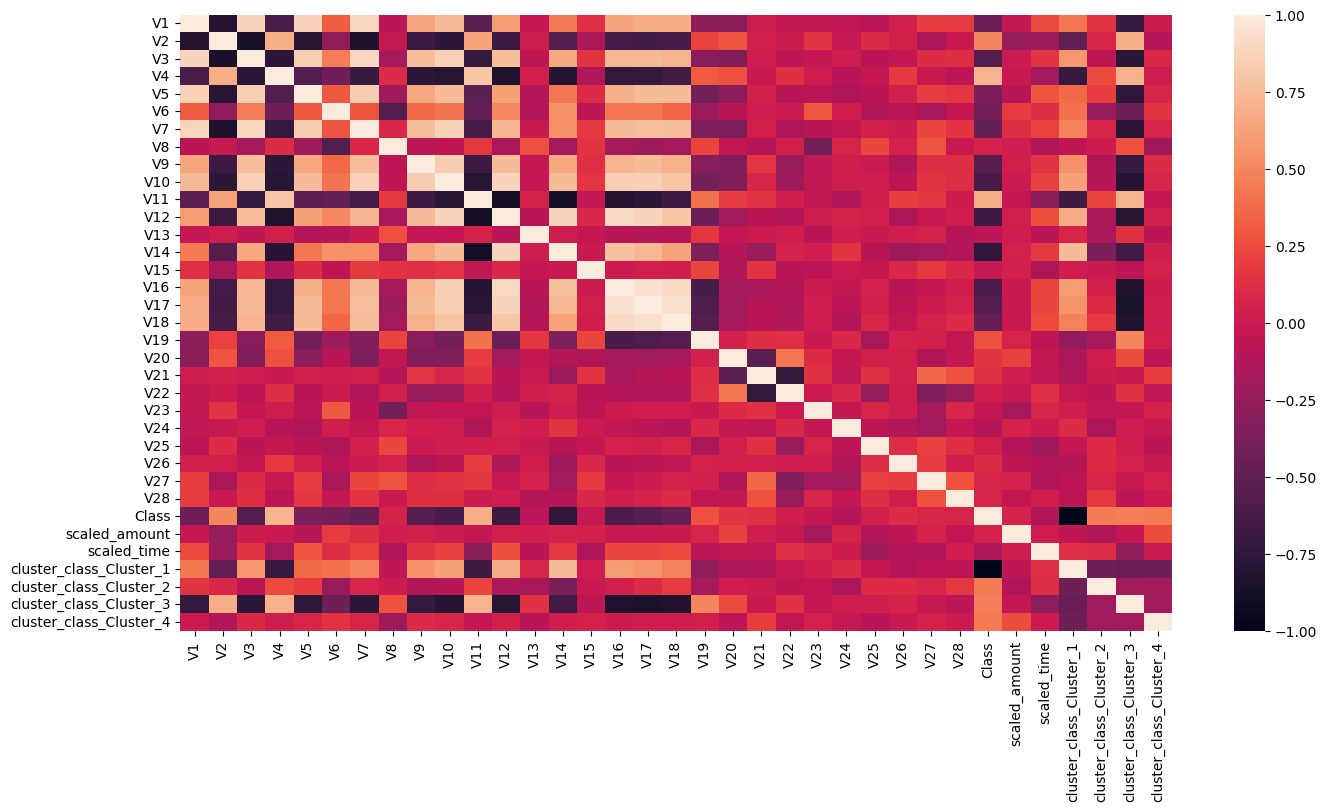

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

y_preds = []
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_preds.append(y_pred)
    acc = accuracy_score(y_test,y_pred)
    print('Test accuracy for',str(classifier)[:-2],'-->',acc)

Test accuracy for LogisticRegression --> 1.0
Test accuracy for KNeighborsClassifier --> 0.934010152284264
Test accuracy for SVC --> 0.9390862944162437
Test accuracy for DecisionTreeClassifier --> 1.0


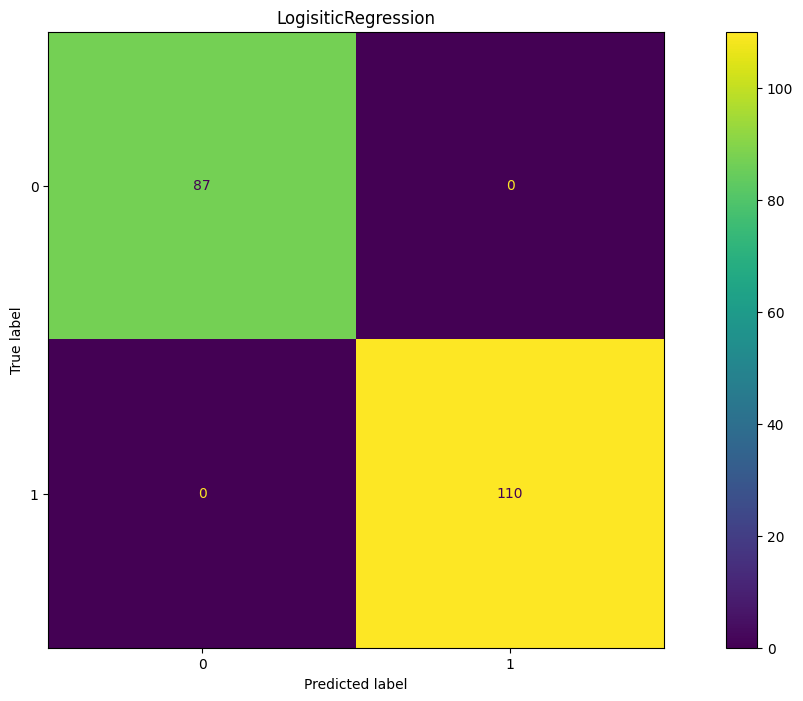

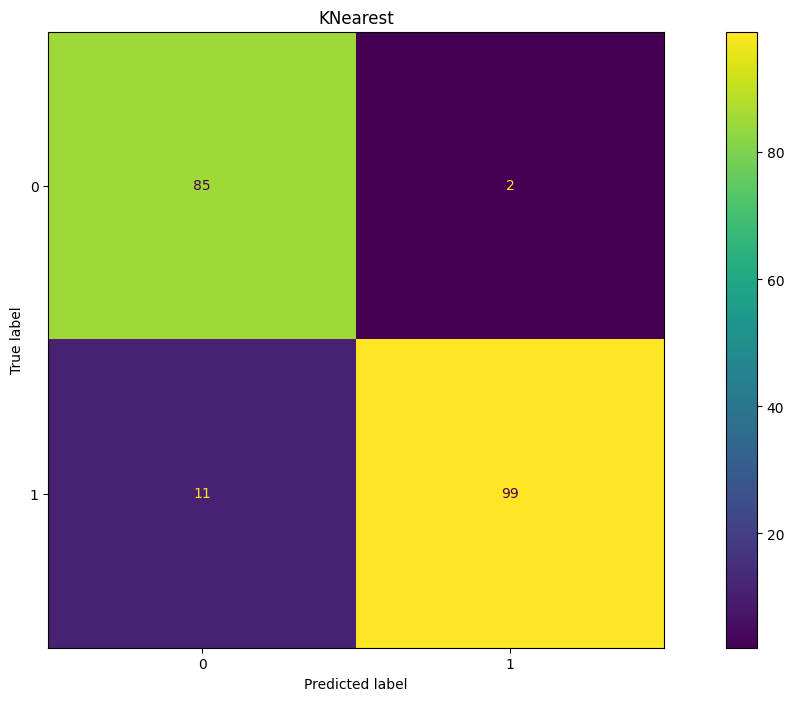

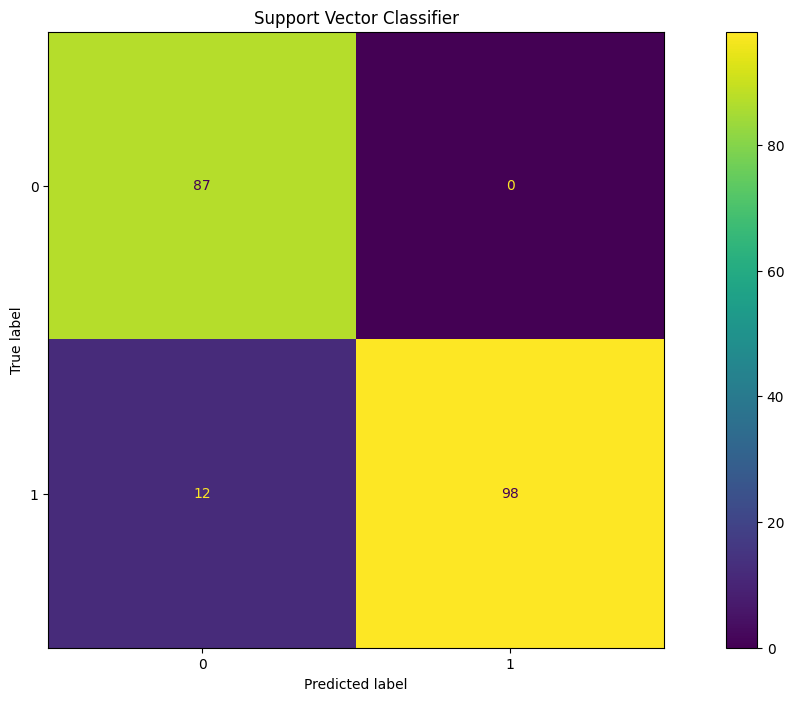

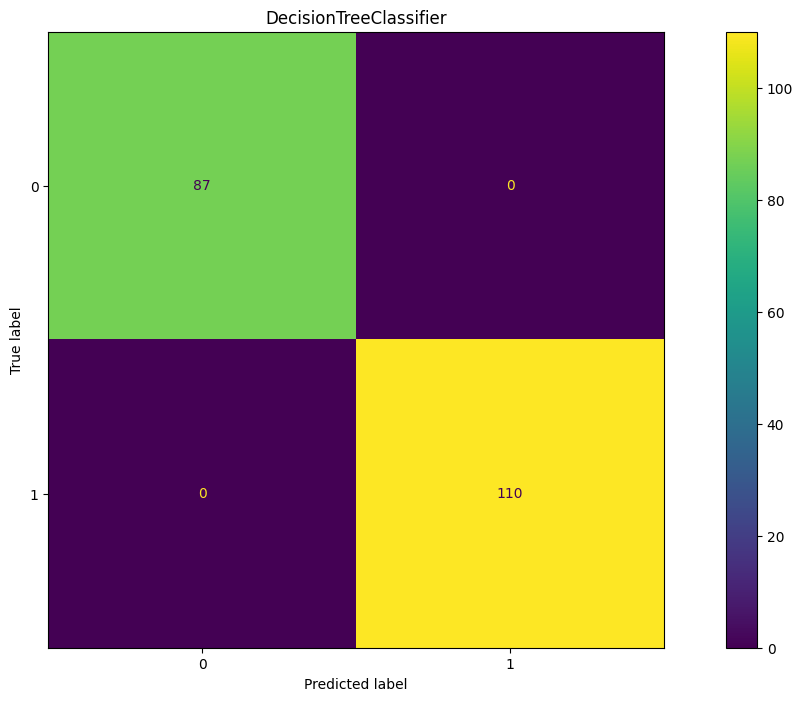

In [ ]:
for y_pred,clf_name in zip(y_preds,list(classifiers)):
    cm = confusion_matrix(y_test,y_pred)
    clf = classifiers[clf_name]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=clf.classes_)

    disp.plot()
    disp.ax_.set(title=clf_name)

# Research Questions


1) Cluster the dataset to find the appropriate grouping so as to create a feature helpful for classifying fraud transactions.

2) Use the existing dataset in addition to the observed cluster number as set of feature to classify fraud transaction.

Methods

- Scale Amount and Time column, Since other columns were already normalized.
- Apply K-means to get respective cluster number for all data points.
- Check cluster number for all fraud transaction. we found that two cluster contains most of the transactions.
- So, consider these two cluster as cluster_1 and cluster_2, assign all other fraud transaction within cluster_3 and assign all non-fraud transaction as cluster_4

- create a new feature using this cluster number.
- Now apply Various ML models to classify fraud/non-fraud transactions.
- Since total number of Fraud transaction was 492, therefore to consider the balanced dataset we randomly selected 492 non-fraud transaction for model training/testing.

- we used LogisiticRegression,KNearest,Support Vector Classifier,DecisionTreeClassifier and found that DecisionTreeClassifier is giving 100% accuracy.

Discussion

The logistic regression model achieved a test accuracy of 0.9898, which indicates that it correctly classified approximately 98.98% of the instances in the test dataset. This high accuracy suggests that the logistic regression model is effective at distinguishing between different classes in the dataset.The KNN classifier achieved a test accuracy of 0.9239, meaning it correctly classified around 92.39% of the instances in the test dataset. This accuracy is slightly lower compared to logistic regression, indicating that KNN may not be as effective on this particular dataset.The SVC model also achieved a test accuracy of 0.9239, which is the same as the KNN classifier. The decision tree classifier achieved a perfect test accuracy of 1.0, indicating that it correctly classified all instances in the test dataset. A test accuracy of 1.0 suggests that the decision tree model fits the training data extremely well.